# Libraries

In [20]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns

from numpy import mean
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

# Loading data

In [4]:
# Load lines from mfeat-pix.txt
features = open('mfeat-pix.txt').readlines()

# Create labels for each line, 0-9 for each 200 lines
labels = []
for i in range(10):
    for j in range(200):
        labels.append(i)
labels = np.array(labels)

# Convert each line to a numpy array
for i in range(len(features)):
    features[i] = np.array(features[i].split()).astype('float')
    # Normalize
    features[i] = features[i] / 6
features = np.array(features)

# PCA Optimizer

In [ ]:
def optimizer(X_train, X_test, y_train, y_test):
    best_accuracy = 0

    for i in range(199):

        i += 2

        pipe = Pipeline([('pca', PCA(n_components=i)), ('lg', LogisticRegression())])
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=40)
        accuracy = mean(cross_val_score(pipe, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise'))

        if(accuracy > best_accuracy):
            best_accuracy = accuracy
            component = i

        print("Component {}/200 has accuracy of {:.4f}. The best accuracy found so far is {:.4f} with {} components.".format(i, accuracy, best_accuracy, component), end="\r")

    return component

# Split data into train and test

In [5]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=40, stratify=labels)
y_train.reshape(y_train.shape[0]);
y_test.reshape(y_test.shape[0])


# Load augmented data

In [6]:
# Load augmented data
X_train_aug = np.load('X_train_augmented.npy')
X_train_aug = np.array([ff.reshape(240) for ff in X_train_aug])
Y_train_aug = np.array(np.load('y_train_augmented.npy'))

X_test_aug = np.load('X_test_augmented.npy')
X_test_aug = np.array([ff.reshape(240) for ff in X_test_aug])
Y_test_aug = np.array(np.load('y_test_augmented.npy'))


# Logistic Regression Original Data

In [11]:
model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

score = model.score(X_test, y_test)
print(score)

0.9525
auto


/Users/cia/PycharmProjects/MLfinal/ven/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Logistic Regression PCA Original Data

0.9525


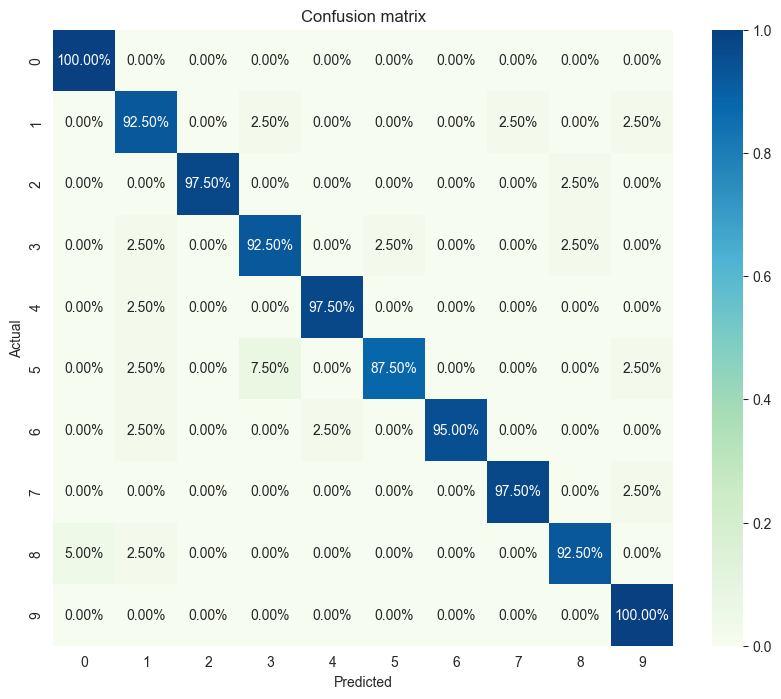

In [33]:
# Run PCA on original data
components = optimizer(X_train, X_test, y_train, y_test)

print("\nUsed Components: {}".format(components))

pca = PCA(n_components = components)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

print("done")
model = LogisticRegression()
model.fit(X_train_reduced, y_train)

predictions = model.predict(X_test_reduced)

score = model.score(X_test_reduced, y_test)
print(score)

labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Plot confusion matrix in percentages
cm = metrics.confusion_matrix(y_test, predictions)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(12, 10))
sns.set(font_scale=1.4)
res_original = sns.heatmap(cm, annot=True, fmt='.1%', xticklabels=labels, yticklabels=labels, cmap='GnBu')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title('Original Data')

# for _, spine in res_original.spines.items():
#     spine.set_visible(True)
#     spine.set_linewidth(1)

res_original.axhline(y = 0, color='k',linewidth = 1)
res_original.axhline(y = cm.shape[1], color = 'k', linewidth = 2)

res_original.axvline(x = 0, color = 'k', linewidth = 1)

res_original.axvline(x = cm.shape[0], color = 'k', linewidth = 2)

plt.show()

# Logistic Regression PCA Augmented Data

In [21]:
# Run PCA on augmented data
components = optimizer(X_train, X_test, y_train, y_test)

print("\nUsed Components: {}".format(components))

pca = PCA(n_components = components)
X_train_aug_reduced = pca.fit_transform(X_train)
X_test_aug_reduced = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

model = LogisticRegression()
model.fit(X_train_aug_reduced, Y_train_aug)

predictions = model.predict(X_test_aug_reduced)

score = model.score(X_test_aug_reduced, Y_test_aug)
print(score)

0.9625


/Users/cia/PycharmProjects/MLfinal/ven/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


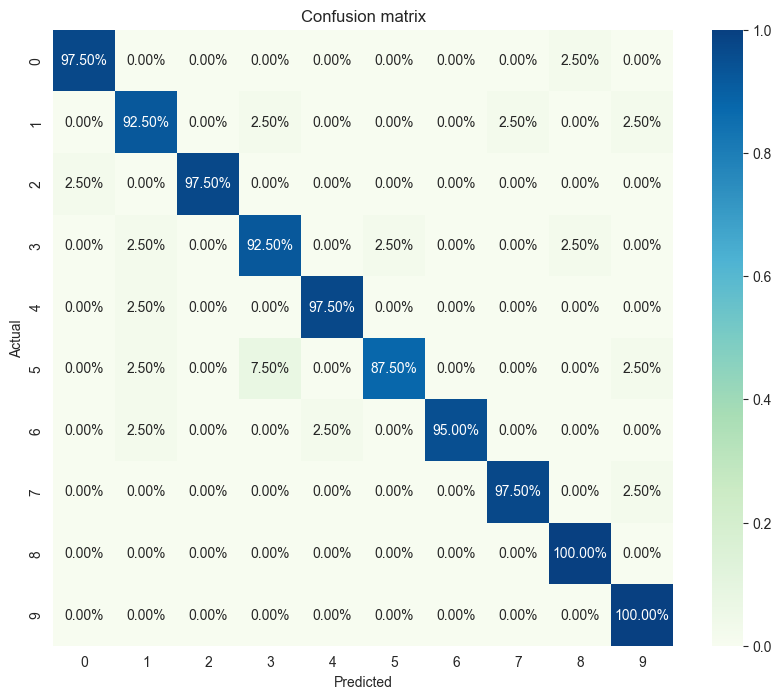

In [31]:
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Plot confusion matrix in percentages
cm = metrics.confusion_matrix(Y_test_aug, predictions)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(12, 10))
sns.set(font_scale=1.5)
res_augmented = sns.heatmap(cm, annot=True, fmt='.1%', xticklabels=labels, yticklabels=labels, cmap='GnBu')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title('Augmented Data')

res_augmented.axhline(y = 0, color='k',linewidth = 1)
res_augmented.axhline(y = cm.shape[1], color = 'k', linewidth = 2)

res_augmented.axvline(x = 0, color = 'k', linewidth = 1)

res_augmented.axvline(x = cm.shape[0], color = 'k', linewidth = 2)

plt.show()